# Домашнее задание 5

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 17 марта. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_5

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}^d} f(x) = \frac{1}{2}x^T A x - b^T x,
\end{equation}
где в качестве матрицы $A$ - случайная матрица с $L =1000$, $\mu = 1$, $d = 100$, $b$ - так же случайный вектор.

### __(а)__ Для такой задачи симулируем итерацию SGD:
$$
x^{k+1} = x^k - \gamma (\nabla f(x^k) + \xi^k),
$$
где $\xi^k$ - независимая от $x^k$ случайная величина из нормального распределения $\mathcal{N}(0, 100)$.

Для такого метода с $\gamma = \frac{1}{L}$ постройте график сходимости (критерий $\| \nabla f(x^k)\|^2$). Постройте на этом же графике сходимость честного градиентного спуска c $\gamma = \frac{1}{L}$. Сделайте вывод о характере сходимости нового метода.

#### Создаем матрицу и столбец: 

In [1]:
from scipy.stats import ortho_group
import numpy as np
def get_matrix_2(d,mu,L):
    vec=np.random.uniform(low=mu, high=L, size=d-2)
    vec=np.append(vec,mu)
    vec=np.append(vec,L)
    print("eigenvals are{}".format(vec))
    O=ortho_group.rvs(dim=d)
    D=np.diag(vec)
    temp=np.matmul(np.transpose(O),D)
    result = np.matmul(temp,O)
    return result

In [2]:
DIMENSIONS=100
mu=1
L=1000
EPSILON=0.00000001

In [3]:
A=get_matrix_2(DIMENSIONS,mu,L)

eigenvals are[  16.16618075  743.30580135  490.51935802  390.31051241  278.79865466
  447.63589166  119.45285255  653.58422141  967.91907972  302.84707436
  436.48701302  828.48262185  322.87547397  859.79279542  870.20029001
  528.29047303  828.43771553  723.35767159  266.73469322  620.04524075
  129.80561331  831.15223861   73.8759304   230.36206675  154.31156685
  581.40311023  171.55340195   51.22886517  342.2527887   673.47211375
  937.7745774   387.01635419  953.09686752  744.73975319   59.17088934
  643.61557174  917.27654888  740.43227229  799.26784541  473.82933005
   50.36938549  515.59843259  372.4425602   704.05162374  856.36181997
  759.8460212   887.17688037  655.35907116  861.02191772   34.48605049
  971.56861442  958.50470011  459.14749905  824.15831803  732.37657934
  372.13288033  936.87862098  896.22021577  989.19162093  736.28252005
  589.55155669  948.8396      637.74850263  166.14210911  943.35322376
  937.46959627  612.3659614   364.34647262  744.71635461  536.68

In [4]:
b=np.random.rand(DIMENSIONS)
b

array([0.7121721 , 0.45617321, 0.05114289, 0.44036725, 0.52323534,
       0.21745231, 0.57857507, 0.85185227, 0.52730428, 0.32906234,
       0.96891211, 0.51994915, 0.6348388 , 0.69278627, 0.40252437,
       0.6303385 , 0.97641638, 0.65677164, 0.72585055, 0.95915614,
       0.41581401, 0.96542535, 0.72028446, 0.33093496, 0.23208215,
       0.76501845, 0.1367775 , 0.85821886, 0.04527344, 0.82240944,
       0.94210847, 0.61729478, 0.74380231, 0.76501141, 0.5244104 ,
       0.69739642, 0.71129333, 0.20980678, 0.47157127, 0.69848088,
       0.62685704, 0.84073338, 0.42024002, 0.33812728, 0.20502599,
       0.08049826, 0.2560292 , 0.28956194, 0.03702237, 0.56481643,
       0.58526854, 0.3171369 , 0.45274854, 0.87377615, 0.35444429,
       0.23445073, 0.10871321, 0.71184598, 0.96872088, 0.13657787,
       0.58359998, 0.41520267, 0.98004303, 0.62238107, 0.2024287 ,
       0.63956306, 0.56837364, 0.17427613, 0.90237136, 0.83631389,
       0.388694  , 0.24887566, 0.73334371, 0.7482448 , 0.59294

In [5]:
def f(x):
    return 1/2*np.matmul(np.matmul(x.T,A),x)-np.matmul(b.T,x)
def grad_f(x):
    return np.matmul(A,x)-b.T

In [6]:
import GD

In [7]:
SGD_SIM=GD.GradientDescent(f,grad_f,L,np.zeros(DIMENSIONS),new_point_formula='sim_SGD',stopping_criteria='delta_grad')
SGD_SIM_RESULTS=SGD_SIM.compute()

amount of iterations is 999


In [8]:
normal_GD=GD.GradientDescent(f,grad_f,L,np.zeros(DIMENSIONS),stopping_criteria='delta_grad')
normal_GD_RESULTS=normal_GD.compute()

amount of iterations is 999


In [9]:
import matplotlib.pyplot as plt
plt.plot(range(len(SGD_SIM_RESULTS[2])),SGD_SIM_RESULTS[2])
plt.plot(range(len(normal_GD_RESULTS[2])),normal_GD_RESULTS[2])

__(б)__ На семинаре обсуждались способы борьбы со "стохастичностью" сходимости градиентного спуска. В частности, мы затронули использование уменьшающегося шага (смотри, например, Теорему 5 из [работы](https://arxiv.org/pdf/1907.04232.pdf)), а также использование батчирования (в нашем случае это просто замена: $\xi^k \to \frac{1}{b} \sum\limits_{i=1}^b \xi^k_i$, где $\xi^k_i \in \mathcal{N}(0, 100)$ и независимы). Реализуйте эти модификации (для батчирования возьмите $b = 10 , 100$). Добавьте полученные результаты на график сходимости из пункта (а). Постройте также график сходимости, где по оси $x$ будет не количество итераций, а количество генераций $\xi^k_i$ (количество вызовов стохастического градиента).

In [10]:
SGD_SIM_DECLINING_STEP=GD.GradientDescent(f,grad_f,L,np.zeros(DIMENSIONS),new_point_formula='sim_SGD',step_choose='declining_step',stopping_criteria='delta_grad')
SGD_SIM_DECLINING_STEP_RESULTS=SGD_SIM_DECLINING_STEP.compute()

amount of iterations is 999


In [11]:
batch=10
SGD_SIM_BATCH_10=GD.GradientDescent(f,grad_f,L,np.zeros(DIMENSIONS),new_point_formula='sim_SGD_batch',additional_data=batch,stopping_criteria='delta_grad')
SGD_SIM_BATCH_10_RESULTS=SGD_SIM_BATCH_10.compute()

amount of iterations is 999


In [12]:
#batch=100
#SGD_SIM_BATCH_100=GD.GradientDescent(f,grad_f,L,np.zeros(DIMENSIONS),new_point_formula='sim_SGD_batch',additional_data=batch,stopping_criteria='delta_grad')
#SGD_SIM_BATCH_100_RESULTS=SGD_SIM_BATCH_100.compute()

<function matplotlib.pyplot.show(*args, **kw)>

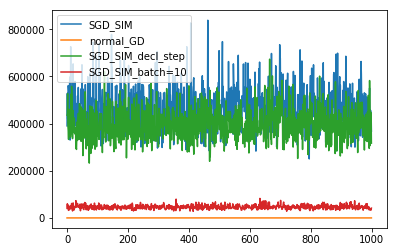

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(len(SGD_SIM_RESULTS[2])),SGD_SIM_RESULTS[2],label='SGD_SIM')
plt.plot(range(len(normal_GD_RESULTS[2])),normal_GD_RESULTS[2],label='normal_GD')
plt.plot(range(len(SGD_SIM_DECLINING_STEP_RESULTS[2])),SGD_SIM_DECLINING_STEP_RESULTS[2],label='SGD_SIM_decl_step')
plt.plot(range(len(SGD_SIM_BATCH_10_RESULTS[2])),SGD_SIM_BATCH_10_RESULTS[2],label='SGD_SIM_batch=10')
#plt.plot(range(len(SGD_SIM_BATCH_100_RESULTS[2])),SGD_SIM_BATCH_100_RESULTS[2],label='SGD_SIM_batch=100')
plt.legend()
plt.show

Симулирования различных SGD показывает что с определенного момента решение начинает осциллировать в окрестности правильного ответа. Различными методами - изменениями батча, добавлением уменьшающегося шага и прочими средставми можно непосредственно уменьшать характерный размер осцилляции.

# Задача 2

Рассмотрим задачу логистической регрессии на датасете mushrooms с $\ell_2$-регуляризацией (коэффициент регуляризации равен $\frac{L}{1000}$). Как мы знаем, эта задача имеет вид конечной суммы:
\begin{equation}
\min_{w \in \mathbb{R}^d} f(w) := \frac{1}{n} \sum\limits_{j=1}^n f_j(w) := \frac{1}{n} \sum\limits_{j=1}^n \left[\frac{1}{b} \sum\limits_{i=1}^b f_{ji}(w)\right] := \frac{1}{n} \sum\limits_{j=1}^n \left[\frac{1}{b} \sum\limits_{i=1}^b l (g(w, x_i), y_i)\right],
\end{equation}
где $nb = N$ - полный размер выборки. Решите данную задачу с помощью SGD, SAGA (секция А.5 из [работы](https://arxiv.org/pdf/1905.11261.pdf)), SVRG (секция А.9 из [работы](https://arxiv.org/pdf/1905.11261.pdf)) и SARAH ([работа](https://arxiv.org/pdf/1703.00102.pdf)). 

## __(а)__ Оцените $\mu$ и $L$ для данной задачи. Обратите внимание, что теория для SAGA, SVRG, SARAH предполагает, что $L$ - это константа Липшица градиентов $\nabla f_j$. 

### $$f=\frac{1}{n}\sum \ln(1+e^{-w^Tx_iy_i})+\frac{L}{1000} x^Tx$$

### $$\nabla f=-\frac{1}{n}\sum\sigma(-y_iw^Tx_i)x_iy_i+\frac{L}{500}x$$

Повторяя выкладки из третьего дз получим, что константа $L$ оценится

$$L \leq \frac{1}{4n}\sum\limits_{i=1}^nx_ix_i^T$$

Теперь, учитывая бачи, можно получить что

$$L \leq \frac{1}{4b}\sum\limits_{i=1}^nx_ix_i^T$$

Из третьей домашки известно, что минимизируемая функция явлется выпуклой. Добавляя регуляризацию мы гарантируем сильную выпуклость, коэффициент сильной выпуклости определяется константой регуляризации.

## __(б)__ Реализуйте SGD, SAGA, SVRG, SARAH для задачи логистической регресии из $n$ слагаемых, где каждое слагаемое так же имеет виды суммы размеры $b$. Каким надо взять $b$? Почему? Что об этом говорит теория? Как будете выбирать шаг и другие параметры методов?

Теория говорит что при большом количестве бачей стохастика маленькая, но метод медленно сходится. Когда бачей мало стохастика становится слишком большой и сходимости тоже нет

In [1]:
from sklearn.datasets import load_svmlight_file
import numpy as np
dataset = "mushrooms.txt" 
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape
y=y-1.5
y=2*y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.2,test_size=0.8, random_state=41)

In [2]:
n=len(X_train)

In [3]:
batches_size=60
from math import floor,ceil
batches_amount=floor(len(X_train)/batches_size)
batches_amount

27

In [4]:
def sigma(x):
    return 1/(1+np.exp(-x))

def gradient(X,y,w):
    summ=0
    for i in range(np.shape(X)[0]):
        summ+=sigma(-y[i]*np.matmul(w.T,X[i]))*X[i]*y[i]
    return -summ/n+w*L/500

In [5]:
X_train=X_train[:-len(X_train)+batches_size*batches_amount]
y_train=y_train[:-len(y_train)+batches_size*batches_amount]
len(X_train)
len(y_train)

1620

In [6]:
def get_L(X):
    summ=0
    for row in X:
        summ+=np.dot(row.T,row)
    return summ/(4*n)

In [7]:
L=get_L(X_train)

In [8]:
batches=[]
batches_y=[]
for j in range(batches_amount-1):
    batches.append(  X_train[batches_size*j:batches_size*(j+1)])
    batches_y.append(y_train[batches_size*j:batches_size*(j+1)])

### 1.SGD

Дополнительно, если проделать заново выкладки из третьей дз, то можно улучшить оценку на L - новая оценка это L делить на размер Бача,т.е. 

In [22]:
ITERATIONS=500
import time

In [23]:
import scipy.stats as st

In [24]:
def SGD(gradient,batches,batches_y,step,max_iter=100):
    times=[]
    numbers=[]#grad(wk)
    x=np.zeros(len(X_train[0]))
    n=len(batches)
    iteration_start = time.time()
    for i in range(max_iter):
        numbers.append(np.linalg.norm(gradient(X_train,y_train,x)))
        uni=st.randint(0,n)
        j=uni.rvs()
        x=x-step*gradient(batches[j],batches_y[j],x)
        iteration_end = time.time()
        times.append(iteration_end-iteration_start)
    return x,numbers,times

In [25]:
SGD_RESULTS=SGD(gradient,batches,batches_y,1/L,ITERATIONS)

### 2.SAGA

Для $SAGA$ и следующий трех методов возьмем $L$ как наибольший среди всех бачей.


In [26]:
def get_L(X):
    summ=0
    for row in X:
        summ+=np.dot(row.T,row)
    return summ/(4*batches_size)

In [27]:
L=0
for batch in batches:
    norm=get_L(batch)
    if(norm>L):
        L=norm
print(L)

5.25


### Продолжаем методы :

In [28]:
def SAGA(gradient,batches,batches_y,step,max_iter=100):
    gradients=[]
    numbers=[]
    times=[]
    x=np.zeros(len(X_train[0]))
    n=len(batches)

    iteration_start = time.time()

    for i in range(n):
        gradients.append(gradient(batches[i],batches_y[i],x)) #Заполняем градиентами в начальной точке
    for i in range(max_iter):
        numbers.append(np.linalg.norm(gradient(X_train,y_train,x)))
        summ=0
        for vec in gradients:
            summ+=vec
        uni=st.randint(0,n)
        j=uni.rvs()
        old_gradient=gradients[j]
        gradients[j]=gradient(batches[j],batches_y[j],x)
        gk=gradients[j]-old_gradient+summ/n
        x=x-step*gk
        iteration_end = time.time()
        times.append(iteration_end-iteration_start)
    return x,numbers,times
        
    

In [29]:
SAGA_RESULTS=SAGA(gradient,batches,batches_y,1/L,ITERATIONS)

### 3.SVRG

__Для SVRG и SARAH количество итераций равно количеству внутренних циклов, в одной из статей писали что обычно берут так__

In [30]:
def SVRG(gradient,batches,batches_y,step,outer_iter=10):
    grad_phi=0
    numbers=[]
    times=[]
    x=np.zeros(len(X_train[0]))
    xes=[x]
    phi=x
    n=len(batches)
    iteration_start = time.time()    
    for s in range(outer_iter):
        for k in range(n):
            numbers.append(np.linalg.norm(gradient(X_train,y_train,x)))
            uni=st.randint(0,n)
            j=uni.rvs()
            gk=gradient(batches[j],batches_y[j],x)-gradient(batches[j],batches[j],phi)+grad_phi
            x=x-step*gk
            xes.append(x)
            iteration_end = time.time()
            times.append(iteration_end-iteration_start)
        summ=0
        for vec in xes:
            summ+=vec
        phi=summ/len(xes)
        grad_phi=gradient(X_train,y_train,phi)
    return x,numbers,times

In [31]:
SVRG_RESULTS=SVRG(gradient,batches,batches_y,1/L,outer_iter=ceil(ITERATIONS/len(batches)))

### 4.SARAH

In [32]:
def SARAH(gradient,batches,batches_y,step,outer_iter=10):
    x=np.zeros(len(X_train[0]))
    numbers=[]
    times=[]
    xes=[]
    n=len(batches)
    iteration_start = time.time()    
    for s in range(outer_iter):
        xes=[x]
        v_prev=0
        for i in range(0,n):
            v_prev+=gradient(batches[i],batches_y[i],x)
        v_prev=v_prev/n
        x_old=x
        x=x-step*v_prev
        xes.append(x)
        for k in range(n):
            numbers.append(np.linalg.norm(gradient(X_train,y_train,x)))
            uni=st.randint(0,n)
            j=uni.rvs()
            vt=gradient(batches[j],batches_y[j],x)-gradient(batches[j],batches[j],x_old)+v_prev
            v_prev=vt
            x_old=x
            x=x-step*vt
            xes.append(x)
            iteration_end = time.time()
            times.append(iteration_end-iteration_start)
        uni=st.randint(0,n)
        j=uni.rvs()
        x=xes[j]
    return x,numbers,times

In [33]:
SARAH_RESULTS=SARAH(gradient,batches,batches_y,1/L,outer_iter=ceil(ITERATIONS/len(batches)))

## __(в)__ Постройте графики сравнения всех методов: по оси $x$ используйте время или количество подсчетов $\nabla f_{ji}$, по оси $y$ - $\|\nabla f(w^k)\|$ или точность на тесте. Таким образом, всего 4 графика. Сделайте сравнение и вывод.

<function matplotlib.pyplot.show(*args, **kw)>

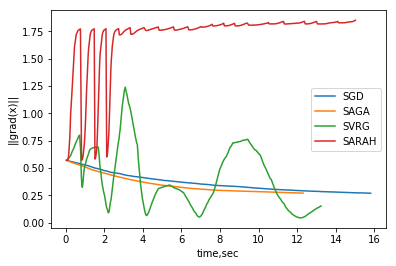

In [34]:
import matplotlib.pyplot as plt
plt.plot(SGD_RESULTS[2],SGD_RESULTS[1],label='SGD')
plt.plot(SAGA_RESULTS[2],SAGA_RESULTS[1],label='SAGA')
plt.plot(SVRG_RESULTS[2],SVRG_RESULTS[1],label='SVRG')
plt.plot(SARAH_RESULTS[2],SARAH_RESULTS[1],label='SARAH')
plt.xlabel('time,sec')
plt.ylabel('||grad(x)||')
plt.legend()
plt.show

При перезапуске программы с другими размерами бача можно увидеть что SVRG начинает сходиться/расходиться, SARAH начинает сходиться при больших размерах бача(порядка нескольких сотен) а SGD/SAGA достаточно монотонно идут к минимуму.

__Бонусные пункты__

__(г)__ Методы SGD, SAGA, SVRG, SARAH, которые мы рассматривали, предполагают случайный выбор индекса на каждой итерации. Но между тем, на практике обычно делают по-другому и просто последовательно меняют $i_k$ от $1$ до $n$ (а потом заново). В [работе](https://arxiv.org/abs/2006.05988) изучаются такие подходы. Реализуйте Random Reshuffling и Shuffle Once для SGD и SARAH. Сравните новые алгоритмы со старыми версиями SGD и SARAH из пунктов (б) и (в).

In [35]:
#ответ

__(д)__ Методы SVRG и SARAH имеют loopless версии: L-SVRG (секция А.10 из [работы](https://arxiv.org/pdf/1905.11261.pdf) и PAGE ([работа](https://proceedings.mlr.press/v139/li21a.html)), соотвественно. Реализуйте их. Как будете выбирать вероятности в этих алгоритмах? Сравните новые алгоритмы со старыми версиями SVRG и SARAH из пунктов (б) и (в).

In [36]:
#ответ